# A Case Study for our Sebogy

## Setup

Some setup stuff that you don't have to worry about for now.

In [1]:
import sys
sys.path.append("..")

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [21]:
plt.rcParams["figure.figsize"] = 16, 9

## Read Files

For convenience, I have already loaded the files for you.

In [33]:
overall = pd.read_csv("../data/2017_german_election_overall.csv", index_col=0)
overall = overall.rename({"registered.voters": "registered_voters", "area_names": "area_name"}, axis=1)

party = pd.read_csv("../data/2017_german_election_party.csv", index_col=0)

In [34]:
overall.head()

area_id                          area_name               state  \
1        1              Flensburg – Schleswig  Schleswig-Holstein   
2        2  Nordfriesland – Dithmarschen Nord  Schleswig-Holstein   
3        3       Steinburg – Dithmarschen Süd  Schleswig-Holstein   
4        4              Rendsburg-Eckernförde  Schleswig-Holstein   
5        5                               Kiel  Schleswig-Holstein   

   registered_voters  total_votes  invalid_first_votes  invalid_second_votes  \
1             225659       171905                 1647                  1509   
2             186384       139200                 1299                  1125   
3             175950       132016                 1133                  1141   
4             199632       157387                 1285                  1119   
5             204650       151463                 1657                  1290   

   valid_first_votes  valid_second_votes  
1             170258              170396  
2             137901              138075  
3             130883              130875  
4             156102              156268  
5             149806              150173

In [35]:
party.head()

area_id                          area_name               state  \
1        1              Flensburg – Schleswig  Schleswig-Holstein   
2        2  Nordfriesland – Dithmarschen Nord  Schleswig-Holstein   
3        3       Steinburg – Dithmarschen Süd  Schleswig-Holstein   
4        4              Rendsburg-Eckernförde  Schleswig-Holstein   
5        5                               Kiel  Schleswig-Holstein   

                                         party  votes_first_vote  \
1  Christlich.Demokratische.Union.Deutschlands             68102   
2  Christlich.Demokratische.Union.Deutschlands             62260   
3  Christlich.Demokratische.Union.Deutschlands             54812   
4  Christlich.Demokratische.Union.Deutschlands             66625   
5  Christlich.Demokratische.Union.Deutschlands             45691   

   votes_second_vote  
1              58307  
2              52933  
3              47367  
4              56584  
5              40011

We are merging the party and the overall table over the `area_id` primary key.

In [43]:
party_overall = party[["area_id", "party", "votes_first_vote", "votes_second_vote"]].merge(overall, how="left", on="area_id")

party_overall = party_overall[["area_id", "area_name", "state", "registered_voters", "total_votes", "invalid_first_votes", "invalid_second_votes", "party", "votes_first_vote", "votes_second_vote"]]
party_overall = party_overall.rename({"votes_first_vote": "party_votes_first_vote", "votes_second_vote": "party_votes_second_vote"}, axis=1)

party_overall

area_id                                          area_name  \
0            1                              Flensburg – Schleswig   
1            2                  Nordfriesland – Dithmarschen Nord   
2            3                       Steinburg – Dithmarschen Süd   
3            4                              Rendsburg-Eckernförde   
4            5                                               Kiel   
5            6                                  Plön – Neumünster   
6            7                                          Pinneberg   
7            8                          Segeberg – Stormarn-Mitte   
8            9                        Ostholstein – Stormarn-Nord   
9           10                 Herzogtum Lauenburg – Stormarn-Süd   
10          11                                             Lübeck   
11          12  Schwerin – Ludwigslust-Parchim I – Nordwestmec...   
12          13  Ludwigslust-Parchim II – Nordwestmecklenburg I...   
13          14                     Rostock – Landkreis Rostock II   
14          15         Vorpommern-Rügen – Vorpommern-Greifswald I   
15          16  Mecklenburgische Seenplatte I – Vorpommern-Gre...   
16          17  Mecklenburgische Seenplatte II – Landkreis Ros...   
17          18                                      Hamburg-Mitte   
18          19                                     Hamburg-Altona   
19          20                                 Hamburg-Eimsbüttel   
20          21                                       Hamburg-Nord   
21          22                                   Hamburg-Wandsbek   
22          23                        Hamburg-Bergedorf – Harburg   
23          24                                     Aurich – Emden   
24          25                                           Unterems   
25          26               Friesland – Wilhelmshaven – Wittmund   
26          27                              Oldenburg – Ammerland   
27          28         Delmenhorst – Wesermarsch – Oldenburg-Land   
28          29                                Cuxhaven – Stade II   
29          30                             Stade I – Rotenburg II   
...        ...                                                ...   
12827      270                                 Aalen – Heidenheim   
12828      271                                    Karlsruhe-Stadt   
12829      272                                     Karlsruhe-Land   
12830      273                                            Rastatt   
12831      274                                         Heidelberg   
12832      275                                           Mannheim   
12833      276                                  Odenwald – Tauber   
12834      277                                       Rhein-Neckar   
12835      278                            Bruchsal – Schwetzingen   
12836      279                                          Pforzheim   
12837      280                                               Calw   
12838      281                                           Freiburg   
12839      282                                 Lörrach – Müllheim   
12840      283                                 Emmendingen – Lahr   
12841      284                                          Offenburg   
12842      285                              Rottweil – Tuttlingen   
12843      286                                   Schwarzwald-Baar   
12844      287                                           Konstanz   
12845      288                                           Waldshut   
12846      289                                         Reutlingen   
12847      290                                           Tübingen   
12848      291                                                Ulm   
12849      292                                           Biberach   
12850      293                                           Bodensee   
12851      294                                         Ravensburg   
12852      295                           Zollernalb – Sigmaringen   
12853

## Support

In case you are stuck, there are several ways to find help.

1. https://pandas.pydata.org/pandas-docs/stable/, the pandas documentation.
2. https://stackoverflow.com/, where all developers go 100 times day.
3. You can of course ask me for help.

## Example

This is an example of how you can filter(`[]`), group (`groupby`) and aggreate (`sum`) data und visualize (`plot`) it.
Visualized it the number of votes per state.  
The following plot shows the number of votes for CDU and SPD per state.

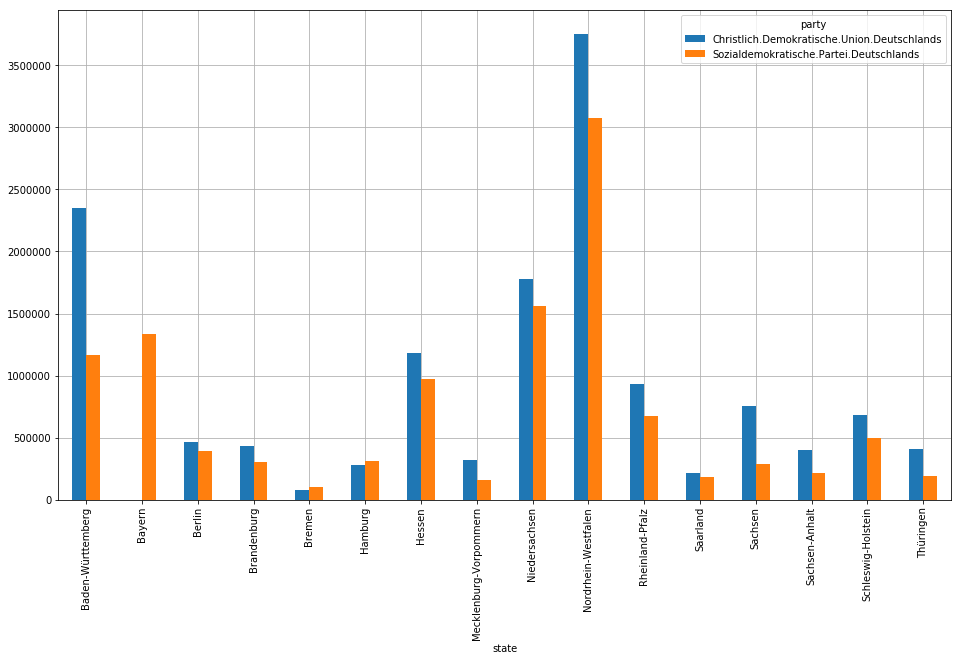

In [66]:
fig = plt.figure()
ax = fig.gca()

party_overall[party_overall["party"].isin(["Christlich.Demokratische.Union.Deutschlands", "Sozialdemokratische.Partei.Deutschlands"])]\
    .groupby(["state", "party"])["party_votes_first_vote"]\
    .sum()\
    .unstack()\
    .plot(kind="bar", ax=ax, zorder=2)

ax.grid(True, zorder=0)

## This is Where You Start

Some questions you could try to answer:  

1. Which state has the highest number of voters?  
2. Which area has the highest voter turnout (wahlbeteiligung)?
3. Which party received the most votes in the area with the highest relative amount of invalid_first_votes?
4. For each party, in what is the highest relative amount of votes the received? In which area was that?

But most importantly, Data Science is about being curious. So feel free to state your own questions and try to answer them. :)

*Have fun!*

In [67]:
# put your code here...